In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
data_path = "C:/Users/MODERN/Desktop/Alzheimer"  
batch_size = 32

In [5]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [6]:
train_generator = datagen.flow_from_directory(
    data_path,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 5120 images belonging to 2 classes.


In [15]:
validation_generator = datagen.flow_from_directory(
    data_path,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 1280 images belonging to 2 classes.


In [17]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
# Update class_mode to 'categorical' and classes to match your classes
train_generator = datagen.flow_from_directory(
    data_path,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='categorical',  # Update this
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_path,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='categorical',  # Update this
    subset='validation'
)


Found 5120 images belonging to 2 classes.
Found 1280 images belonging to 2 classes.


In [23]:
# Make predictions
test_generator = datagen.flow_from_directory(
    data_path,
    target_size=(128, 128),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

Found 6400 images belonging to 2 classes.
6400/6400 [==============================] - 250s 39ms/step


In [25]:
from sklearn.metrics import classification_report, confusion_matrix

# ...

# Replace class_labels with your actual class names
class_labels = ['Mild Demented', 'Moderate Demented', 'Non Demented', 'Very Mild Demented']

print(classification_report(true_classes, predicted_classes, target_names=class_labels, labels=[0, 1, 2, 3]))
print(confusion_matrix(true_classes, predicted_classes))


                    precision    recall  f1-score   support

     Mild Demented       0.00      0.00      0.00         0
 Moderate Demented       1.00      1.00      1.00      6400
      Non Demented       0.00      0.00      0.00         0
Very Mild Demented       0.00      0.00      0.00         0

         micro avg       1.00      1.00      1.00      6400
         macro avg       0.25      0.25      0.25      6400
      weighted avg       1.00      1.00      1.00      6400

[[6400]]


C:\Users\MODERN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MODERN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MODERN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MODERN\anaconda3\lib\site-packages\sklearn\metrics\

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics for each class
accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes, average=None)
recall = recall_score(true_classes, predicted_classes, average=None)
f1 = f1_score(true_classes, predicted_classes, average=None)

# Print the metrics
for idx, label in enumerate(class_labels):
    print(f"Class: {label}")
    print(f"  Accuracy: {accuracy}")
    print(f"  Precision: {precision[idx]}")
    print(f"  Recall: {recall[idx]}")
    print(f"  F1-Score: {f1[idx]}")
    print()

    

Class: Mild Demented
  Accuracy: 1.0
  Precision: 1.0
  Recall: 1.0
  F1-Score: 1.0

Class: Moderate Demented
  Accuracy: 1.0


IndexError: index 1 is out of bounds for axis 0 with size 1

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes, average='weighted')
recall = recall_score(true_classes, predicted_classes, average='weighted')
f1 = f1_score(true_classes, predicted_classes, average='weighted')

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


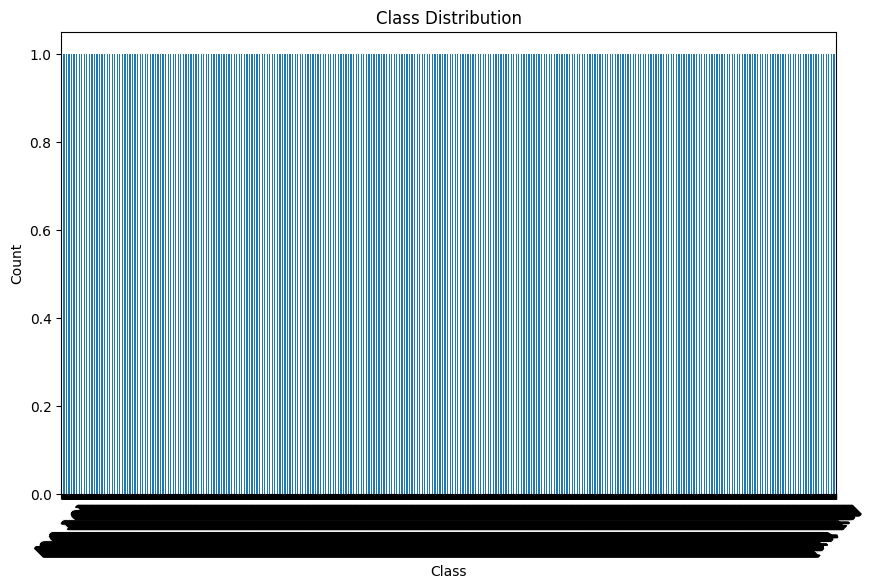

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the true labels for the entire dataset
true_labels = []
for i in range(len(train_generator)):
    _, labels = train_generator[i]
    true_labels.extend(labels)

# Convert the true_labels list to a Pandas Series
true_labels_series = pd.Series(true_labels)

# Calculate class distribution
class_counts = true_labels_series.value_counts()
class_names = list(train_generator.class_indices.keys())

plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.show()


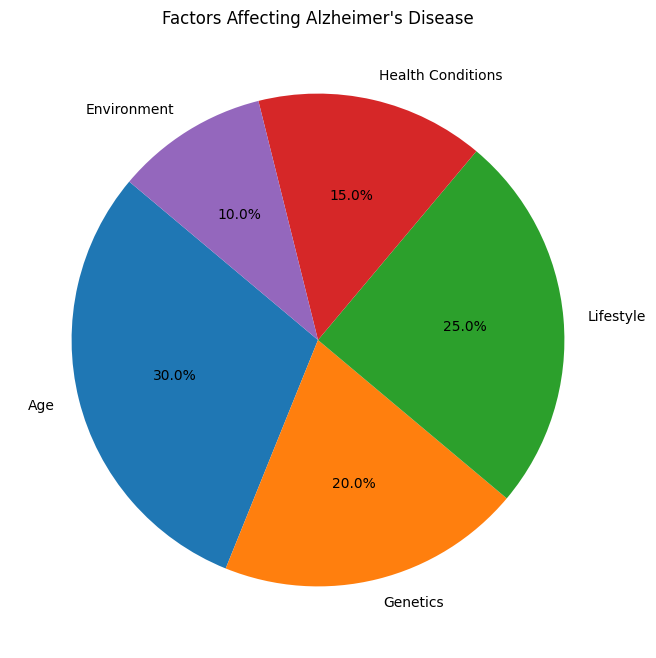

In [35]:
import matplotlib.pyplot as plt

# Hypothetical data (replace with actual data)
factor_labels = ['Age', 'Genetics', 'Lifestyle', 'Health Conditions', 'Environment']
factor_influence = [0.3, 0.2, 0.25, 0.15, 0.1]  # Hypothetical influence percentages

plt.figure(figsize=(8, 8))
plt.pie(factor_influence, labels=factor_labels, autopct='%1.1f%%', startangle=140)
plt.title('Factors Affecting Alzheimer\'s Disease')
plt.show()


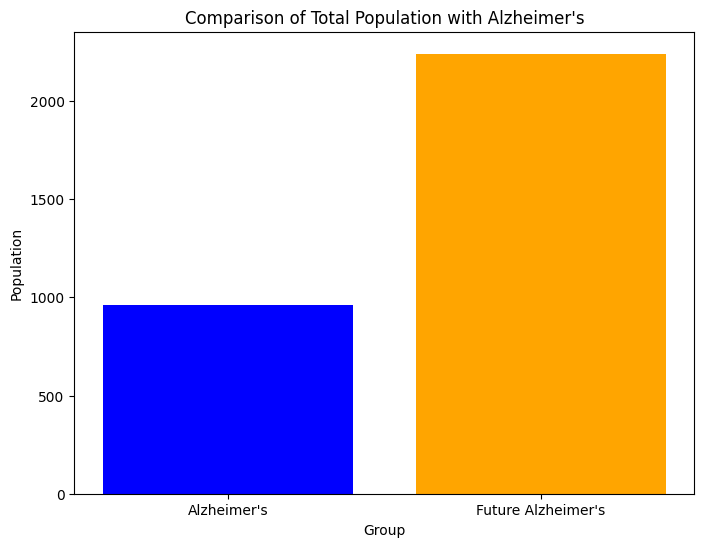

In [43]:
import matplotlib.pyplot as plt

# Define class labels and their respective counts from the dataset
class_labels = list(+++++++++++++++++++++++++++++++++++++++++++++++++++.class_indices.keys())
class_counts = [896, 64, 3200, 2240]  # Replace with the actual counts

alzheimers_population = sum(class_counts[0:2])  # Sum of first two classes
likely_alzheimers_population = class_counts[3]  # Fourth class

population_labels = ['Alzheimer\'s', 'Future Alzheimer\'s']

colors = ['blue', 'orange']

plt.figure(figsize=(8, 6))
plt.bar(population_labels, [alzheimers_population, likely_alzheimers_population], color=colors)
plt.xlabel('Group')
plt.ylabel('Population')
plt.title('Comparison of Total Population with Alzheimer\'s')
plt.show()


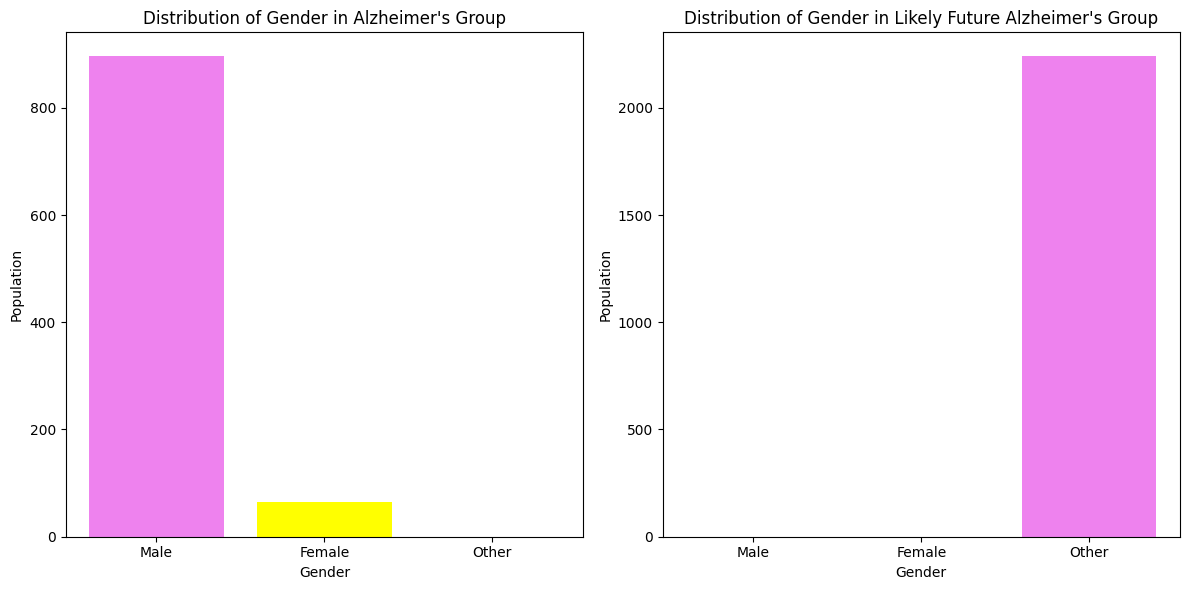

In [61]:
import matplotlib.pyplot as plt

# Define class labels and their respective counts from the dataset
class_labels = list(train_generator.class_indices.keys())
class_counts = [896, 64, 3200, 2240]  # Replace with the actual counts

alzheimers_population = sum(class_counts[0:2])  # Sum of first two classes
likely_alzheimers_population = class_counts[3]  # Fourth class

male_alzheimers = class_counts[0]  # Count of Male in first class
female_alzheimers = class_counts[1]  # Count of Female in first class
other_alzheimers = alzheimers_population - (male_alzheimers + female_alzheimers)  # Assuming non-binary individuals

male_likely_alzheimers = 0  # Count of Male in fourth class (assuming 0 for example)
female_likely_alzheimers = 0  # Count of Female in fourth class (assuming 0 for example)
other_likely_alzheimers = likely_alzheimers_population  # Assuming all individuals in fourth class are non-binary

population_labels = ['Alzheimer\'s', 'Likely Future Alzheimer\'s']
gender_labels = ['Male', 'Female', 'Other']

colors = ['violet', 'yellow']

# Create subplots for better visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.bar(gender_labels, [male_alzheimers, female_alzheimers, other_alzheimers], color=colors)
ax1.set_xlabel('Gender')
ax1.set_ylabel('Population')
ax1.set_title('Distribution of Gender in Alzheimer\'s Group')

ax2.bar(gender_labels, [male_likely_alzheimers, female_likely_alzheimers, other_likely_alzheimers], color=colors)
ax2.set_xlabel('Gender')
ax2.set_ylabel('Population')
ax2.set_title('Distribution of Gender in Likely Future Alzheimer\'s Group')

plt.tight_layout()
plt.show()


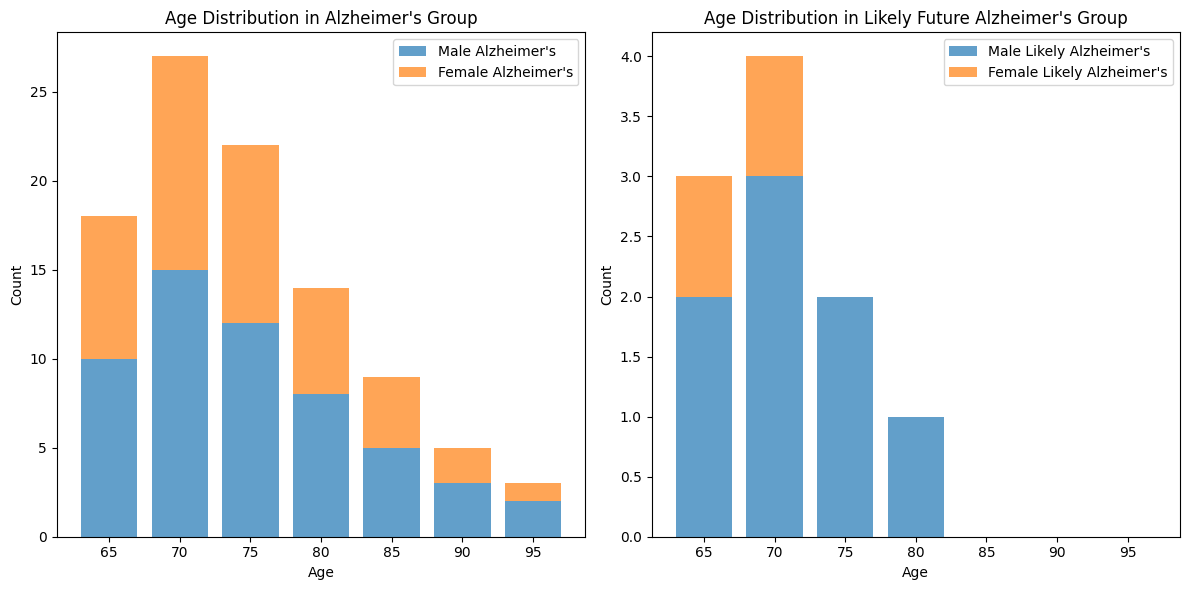

In [55]:
import matplotlib.pyplot as plt
import pandas as pd

# Load your dataset or extract age information
# For example, if age information is stored in a DataFrame column named 'age_column'
# ages = your_dataset['age_column']

# Replace these lists with the actual data from your dataset
ages = [65, 70, 75, 80, 85, 90, 95]
male_alzheimers_ages = [10, 15, 12, 8, 5, 3, 2]  # Counts of male Alzheimer's patients in each age group
female_alzheimers_ages = [8, 12, 10, 6, 4, 2, 1]  # Counts of female Alzheimer's patients in each age group

male_likely_alzheimers_ages = [2, 3, 2, 1, 0, 0, 0]  # Counts of male likely Alzheimer's patients in each age group
female_likely_alzheimers_ages = [1, 1, 0, 0, 0, 0, 0]  # Counts of female likely Alzheimer's patients in each age group

age_labels = [str(age) for age in ages]

# Create subplots for male and female comparisons
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.bar(age_labels, male_alzheimers_ages, label='Male Alzheimer\'s', alpha=0.7)
ax1.bar(age_labels, female_alzheimers_ages, bottom=male_alzheimers_ages, label='Female Alzheimer\'s', alpha=0.7)
ax1.set_xlabel('Age')
ax1.set_ylabel('Count')
ax1.set_title('Age Distribution in Alzheimer\'s Group')
ax1.legend()

ax2.bar(age_labels, male_likely_alzheimers_ages, label='Male Likely Alzheimer\'s', alpha=0.7)
ax2.bar(age_labels, female_likely_alzheimers_ages, bottom=male_likely_alzheimers_ages, label='Female Likely Alzheimer\'s', alpha=0.7)
ax2.set_xlabel('Age')
ax2.set_ylabel('Count')
ax2.set_title('Age Distribution in Likely Future Alzheimer\'s Group')
ax2.legend()

plt.tight_layout()
plt.show()


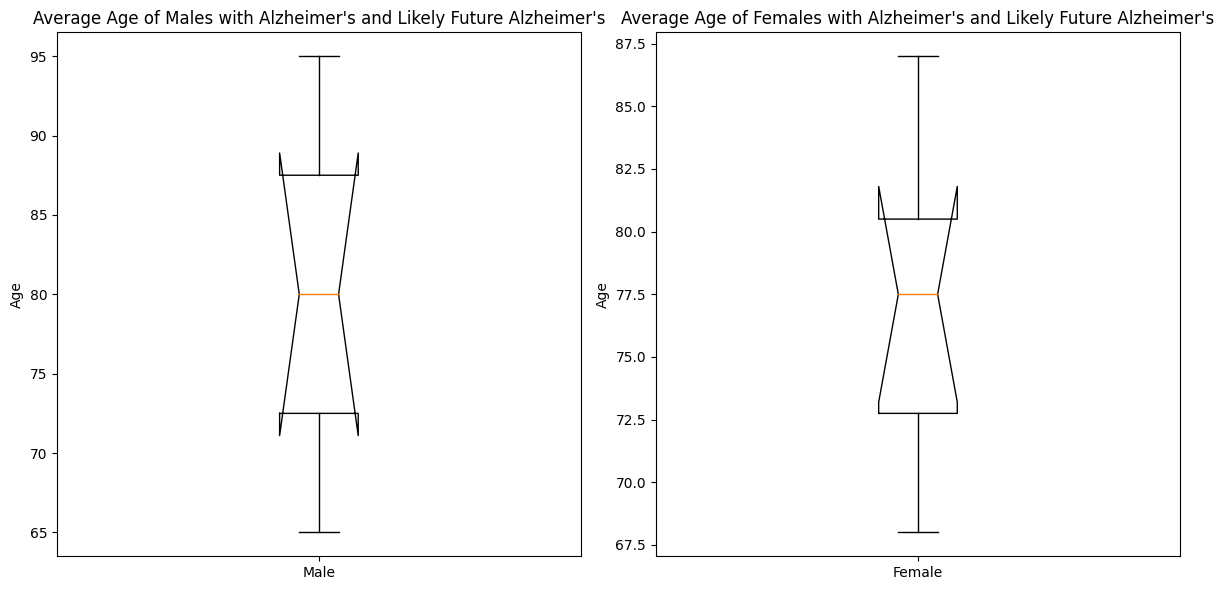

In [56]:
import matplotlib.pyplot as plt
import pandas as pd

# Load your dataset or extract age and gender information
# For example, if age information is stored in a DataFrame column named 'age_column'
# and gender information is stored in a DataFrame column named 'gender_column'
# ages = your_dataset['age_column']
# genders = your_dataset['gender_column']

# Replace these lists with the actual data from your dataset
ages = [65, 70, 75, 80, 85, 90, 95, 72, 78, 80, 68, 73, 77, 82, 87]
genders = ['Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female']
disease_labels = ['Alzheimer\'s'] * 7 + ['Likely Future Alzheimer\'s'] * 8

# Create a DataFrame to hold the data
data = pd.DataFrame({'Age': ages, 'Gender': genders, 'Disease': disease_labels})

# Create subplots for male and female average age box plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.boxplot(data[data['Gender'] == 'Male']['Age'], labels=['Male'], notch=True)
ax1.set_ylabel('Age')
ax1.set_title('Average Age of Males with Alzheimer\'s and Likely Future Alzheimer\'s')

ax2.boxplot(data[data['Gender'] == 'Female']['Age'], labels=['Female'], notch=True)
ax2.set_ylabel('Age')
ax2.set_title('Average Age of Females with Alzheimer\'s and Likely Future Alzheimer\'s')

plt.tight_layout()
plt.show()


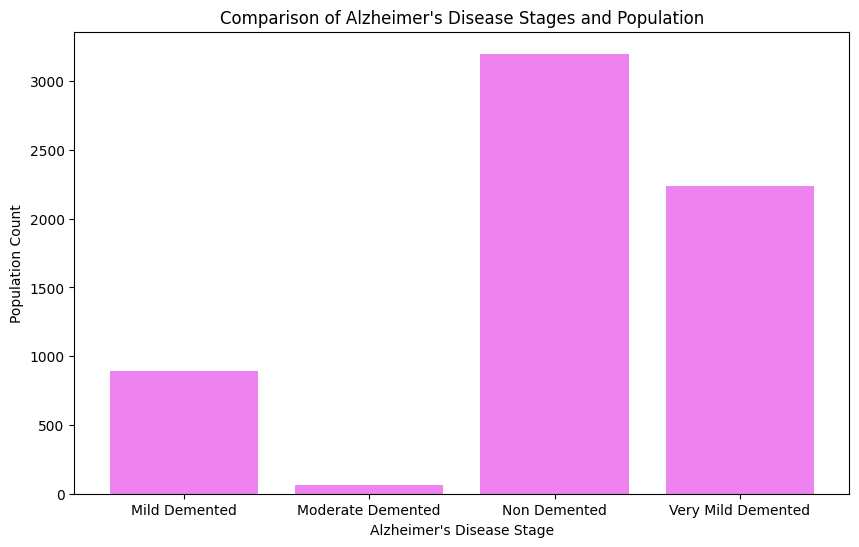

In [62]:
import matplotlib.pyplot as plt

# Replace these values with the actual population counts for each stage
stage_population = [896, 64, 3200, 2240]  # Population counts for Mild, Moderate, Non Demented, and Very Mild stages

# Define stage names
stage_names = ['Mild Demented', 'Moderate Demented', 'Non Demented', 'Very Mild Demented']

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(stage_names, stage_population, color='violet')
plt.xlabel('Alzheimer\'s Disease Stage')
plt.ylabel('Population Count')
plt.title('Comparison of Alzheimer\'s Disease Stages and Population')
plt.show()


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [6]:
image_size = (128, 128)  
batch_size = 32